#  Synthetic Data Generation and Training Workflow with Warehouse Sim Ready Assets

This notebook is the second part of the SDG and Training Workflow. Here we trainin an Object Detection Network with TAO toolkit

A high level overview of the steps:
* Pulling TAO Docker Container
* Training Detectnet_v2 model with generated Synthetic Data 
* Visualizing Model Performance on Sample Real World Data


#### Run the `generate_data.sh` script. Ensure the path to Isaac Sim is set correctly in the script (`ISAAC_SIM_PATH` corresponds to where Isaac Sim is installed locally on your workstation)

### Table of Contents

This notebook shows an example usecase of Object Detection using DetectNet_v2 in the Train Adapt Optimize (TAO) Toolkit. The model will be trained with the Synthetic Data generated previously.

1. [Set up TAO via Docker container](#head-1)
2. [Download Pretrained model](#head-2)
3. [Convert Dataset to TFRecords for TAO](#head-3)
4. [Provide training specification](#head-4)
5. [Run TAO training](#head-5)
6. [Evaluate trained model](#head-6)
7. [Visualize Model Predictions on Real World Data](#head-7)
8. [Next Steps](#head-8)

## 1. Set up TAO via Docker Container <a class="anchor" id="head-1"></a>

* We will follow the pre-requisites section of [instructions](https://docs.nvidia.com/tao/tao-toolkit/text/tao_toolkit_quick_start_guide.html#running-tao-toolkit) for using TAO toolkit. Make sure that the pre-requisite steps are completed (installing `docker`, `nvidia container toolkit` and `docker login nvcr.io`)

* The docker container being used for training will be pulled in the cells below, make sure you have completed the pre-requisite steps and `docker login nvcr.io` to allow pulling of the container from NGC


In [1]:
import os
%env DOCKER_REGISTRY=nvcr.io
%env DOCKER_NAME=nvidia/tao/tao-toolkit
%env DOCKER_TAG=4.0.0-tf1.15.5 ## for TensorFlow docker

%env DOCKER_CONTAINER=nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5

env: DOCKER_REGISTRY=nvcr.io
env: DOCKER_NAME=nvidia/tao/tao-toolkit
env: DOCKER_TAG=4.0.0-tf1.15.5 ## for TensorFlow docker
env: DOCKER_CONTAINER=nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5


## 2. Download Pretrained Model <a class="anchor" id="head-2"></a>

* We will use the `detectnet_v2` Object Detection model with a `resnet18` backbone
* Make sure the `LOCAL_PROJECT_DIR` environment variable has the path of this cloned repository in the cell below


In [3]:
# os.environ["LOCAL_PROJECT_DIR"] = "<LOCAL_PATH_OF_CLONED_REPO>"
os.environ["LOCAL_PROJECT_DIR"] = os.path.dirname(os.getcwd()) # This is the location of the root of the cloned repo
print(os.environ["LOCAL_PROJECT_DIR"])

e:\synthetic_data_generation_training_workflow


Next, you can use PowerShell to download the model. First, create the folder.
New-Item -ItemType Directory -Path "E:\synthetic_data_generation_training_workflow\local\training\tao\pretrained_model"
Invoke-WebRequest -Uri "https://api.ngc.nvidia.com/v2/models/nvidia/tao/pretrained_detectnet_v2/versions/resnet18/files/resnet18.hdf5" -OutFile "E:\synthetic_data_generation_training_workflow\local\training\tao\pretrained_model\resnet18.hdf5"


## 3. Convert Dataset to TFRecords for TAO <a class="anchor" id="head-3"></a>

* The `Detectnet_v2` model in TAO expects data in the form of TFRecords for training. 
* We can convert the KITTI Format Dataset generated from Part 1 with the `detectnet_v2 dataset_convert` tool provided with TAO toolkit


In [15]:
LOCAL_PROJECT_DIR = "E:/synthetic_data_generation_training_workflow"
DOCKER_CONTAINER = "nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5"


In [ ]:
!docker run --rm --gpus all -v E:/synthetic_data_generation_training_workflow:/workspace/tao-experiments nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5 \
  detectnet_v2 dataset_convert \
  -d /workspace/tao-experiments/local/training/tao/specs/tfrecords/distractors_warehouse.txt \
  -o /workspace/tao-experiments/local/training/tao/tfrecords/distractors_warehouse/



=== TAO Toolkit TensorFlow ===

NVIDIA Release 4.0.0-TensorFlow (build )
TAO Toolkit Version 4.0.0

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This container image and its contents are governed by the TAO Toolkit End User License Agreement.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/tao-toolkit-software-license-agreement

NOTE: The SHMEM allocation limit is set to the default of 64MB.  This may be
   insufficient for TAO Toolkit.  NVIDIA recommends the use of the following flags:
   docker run --gpus all --ipc=host --ulimit memlock=-1 --ulimit stack=67108864 ...

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.
2025-09-30 14:58:13,553 [INFO] iva.detectnet_v2.dataio.build_converter: Instantiatin

2025-09-30 14:57:45.977250: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [18]:
print("Converting Tfrecords for palletjack with additional distractors")

!mkdir -p E:/synthetic_data_generation_training_workflow/local/training/tao/tfrecords/distractors_additional && rm -rf E:/synthetic_data_generation_training_workflow/local/training/tao/tfrecords/distractors_additional/*

!docker run --rm --gpus all -v E:/synthetic_data_generation_training_workflow:/workspace/tao-experiments nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5 \
  detectnet_v2 dataset_convert \
  -d /workspace/tao-experiments/local/training/tao/specs/tfrecords/distractors_additional.txt \
  -o /workspace/tao-experiments/local/training/tao/tfrecords/distractors_additional/


Converting Tfrecords for palletjack with additional distractors


The syntax of the command is incorrect.



=== TAO Toolkit TensorFlow ===

NVIDIA Release 4.0.0-TensorFlow (build )
TAO Toolkit Version 4.0.0

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This container image and its contents are governed by the TAO Toolkit End User License Agreement.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/tao-toolkit-software-license-agreement

NOTE: The SHMEM allocation limit is set to the default of 64MB.  This may be
   insufficient for TAO Toolkit.  NVIDIA recommends the use of the following flags:
   docker run --gpus all --ipc=host --ulimit memlock=-1 --ulimit stack=67108864 ...

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.
2025-09-30 15:02:23,825 [INFO] iva.detectnet_v2.dataio.build_converter: Instantiatin

2025-09-30 15:01:55.073425: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [21]:
print("Converting Tfrecords for kitti trainval dataset")

!mkdir -p E:/synthetic_data_generation_training_workflow/local/training/tao/tfrecords/no_distractors && rm -rf E:/synthetic_data_generation_training_workflow/local/training/tao/tfrecords/no_distractors/*

!docker run --rm --gpus all -v E:/synthetic_data_generation_training_workflow:/workspace/tao-experiments nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5 \
  detectnet_v2 dataset_convert \
  -d /workspace/tao-experiments/local/training/tao/specs/tfrecords/no_distractors.txt \
  -o /workspace/tao-experiments/local/training/tao/tfrecords/no_distractors/


Converting Tfrecords for kitti trainval dataset


The syntax of the command is incorrect.



=== TAO Toolkit TensorFlow ===

NVIDIA Release 4.0.0-TensorFlow (build )
TAO Toolkit Version 4.0.0

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This container image and its contents are governed by the TAO Toolkit End User License Agreement.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/tao-toolkit-software-license-agreement

NOTE: The SHMEM allocation limit is set to the default of 64MB.  This may be
   insufficient for TAO Toolkit.  NVIDIA recommends the use of the following flags:
   docker run --gpus all --ipc=host --ulimit memlock=-1 --ulimit stack=67108864 ...

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.
2025-09-30 15:07:38,938 [INFO] iva.detectnet_v2.dataio.build_converter: Instantiatin

2025-09-30 15:07:19.704765: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 4. Provide Training Specification File <a class="anchor" id="head-4"></a>

* The spec file for training with TAO is provided under `$LOCAL_PROJECT_DIR/specs/training/resnet18_distractors.txt`
* The tfrecords and the synthetic data generated in the previous steps are provided under the `dataset_config` parameter of the file
* Other parameters like `augmentation_config`, `model_config`, `postprocessing_config` can be adjusted. Refer to [this](https://docs.nvidia.com/tao/tao-toolkit/text/object_detection/detectnet_v2.html) for a detailed guideline on adjusting the parameters in the spec file
* For training our model to detect `palletjacks` this `spec` file provided can be used directly


In [2]:
with open(r"E:/synthetic_data_generation_training_workflow/local/training/tao/specs/training/resnet18_distractors.txt") as f:
    print(f.read())


random_seed: 42
dataset_config {
  data_sources {
    tfrecords_path: "/workspace/tao-experiments/local/training/tao/tfrecords/distractors_warehouse/*"
    image_directory_path: "/workspace/tao-experiments/palletjack_sdg/palletjack_data/distractors_warehouse/Camera"
  }
  
  data_sources {
    tfrecords_path: "/workspace/tao-experiments/local/training/tao/tfrecords/distractors_additional/*"
    image_directory_path: "/workspace/tao-experiments/palletjack_sdg/palletjack_data/distractors_additional/Camera"
  }
  
  data_sources {
    tfrecords_path: "/workspace/tao-experiments/local/training/tao/tfrecords/no_distractors/*"
    image_directory_path: "/workspace/tao-experiments/palletjack_sdg/palletjack_data/no_distractors/Camera"
  }
  
  image_extension: "png"
  
  target_class_mapping {
    key: "palletjack"
    value: "palletjack"
  }

 validation_fold: 1

}

augmentation_config {
  preprocessing {
    output_image_width: 640
    output_image_height: 352
    min_bbox_width: 20.0
    mi

### Hyperparameters can be set in the `spec` file. Adjust batch size parameter depending on the VRAM of your GPU 

* You can increase the number of epochs, the number of false positives in real world images keeps decreasing (mAP does not change much after ~250 epochs and usually results in the best trained model for the given dataset)

## 5. Run TAO Training <a class="anchor" id="head-5"></a>

* The `$LOCAL_PROJECT_DIR` will be mounted to the TAO docker for training, this contains all the data, pretrained model and spec files (training and inference) needed

#### Ensure that no `_warning.json` file exists in the `$LOCAL_PROJECT_DIR/cloud/training/tao/tfrecords` sub-folders (`distractors_additional`, `ditractors_warehouse` and `no_distractors`)
* Delete the `_warning.json` files before beginning training
* TAO training won't begin if the structure of the `tfrecords` folder directories is not as expected 

In [5]:
# Setting up env variables for cleaner command line commands.
%env KEY=nvidia_tlt
%env NUM_GPUS=1

env: KEY=nvidia_tlt
env: NUM_GPUS=1


* TAO Training can be stopped and resumed (`checkpoint_interval` parameter specified in the `spec` file)
* Tensorboard visualization can be used with TAO [instructions](https://docs.nvidia.com/tao/tao-toolkit/text/tensorboard_visualization.html#visualizing-using-tensorboard). 
* The `$RESULTS_DIR` parameter is the folder where the `$LOCAL_PROJECT_DIR/local/training/tao/detectnet_v2/resnet18_palletjack` folder which is specified with the `-i` flag in the command below

In [9]:
%env KEY=nvidia_tlt


env: KEY=nvidia_tlt


In [4]:
!docker run --rm --gpus all --ipc=host --ulimit memlock=-1 --ulimit stack=67108864 -v E:/synthetic_data_generation_training_workflow:/workspace/tao-experiments nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5 \
  detectnet_v2 train \
  -e /workspace/tao-experiments/local/training/tao/specs/training/resnet18_distractors.txt \
  -r /workspace/tao-experiments/local/training/tao/detectnet_v2/resnet18_palletjack \
  -k nvidia_tlt



=== TAO Toolkit TensorFlow ===

NVIDIA Release 4.0.0-TensorFlow (build )
TAO Toolkit Version 4.0.0

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This container image and its contents are governed by the TAO Toolkit End User License Agreement.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/tao-toolkit-software-license-agreement

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.
2025-10-01 15:12:12,289 [INFO] iva.common.logging.logging: Log file already exists at /workspace/tao-experiments/local/training/tao/detectnet_v2/resnet18_palletjack/status.json
2025-10-01 15:12:12,292 [INFO] root: Starting DetectNet_v2 Training job
2025-10-01 15:12:12,293 [INFO] __main__: Loading experiment spec at /workspace/ta

2025-10-01 15:12:04.860192: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 6. Evaluate Trained Model <a class="anchor" id="head-6"></a>

* While generating the `tfrecords` part of the total data generated was kept as a validation set (14% of total data)
* We will run our model evaluation on this data to obtain metrics

In [ ]:
!docker run --rm --gpus all -v E:/synthetic_data_generation_training_workflow:/workspace/tao-experiments nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5 \
  detectnet_v2 evaluate \
  -e /workspace/tao-experiments/local/training/tao/specs/training/resnet18_distractors.txt \
  -m /workspace/tao-experiments/local/training/tao/detectnet_v2/resnet18_palletjack/weights/model.tlt \
  -k nvidia_tlt --gpus 1



=== TAO Toolkit TensorFlow ===

NVIDIA Release 4.0.0-TensorFlow (build )
TAO Toolkit Version 4.0.0

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This container image and its contents are governed by the TAO Toolkit End User License Agreement.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/tao-toolkit-software-license-agreement

NOTE: The SHMEM allocation limit is set to the default of 64MB.  This may be
   insufficient for TAO Toolkit.  NVIDIA recommends the use of the following flags:
   docker run --gpus all --ipc=host --ulimit memlock=-1 --ulimit stack=67108864 ...

/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.
2025-10-01 17:21:41,987 [INFO] iva.detectnet_v2.spec_handler.spec_loader: Merging sp

2025-10-01 17:21:34.785025: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


## 7. Visualize Model Performance on Real World Data <a class="anchor" id="head-7"></a>

* Lets visualize the model predictions on a few sample real world images next
* We will use palletjack images in a warehouse from the `LOCO` dataset to understand if the model is capable of performing real world detections
* Additional images can be placed under the `loco_palletjacks` folder of this project. The input folder is specified with the `-i` flag in the command below 

In [9]:
!docker run --rm --gpus all -v E:/synthetic_data_generation_training_workflow:/workspace/tao-experiments nvcr.io/nvidia/tao/tao-toolkit:4.0.0-tf1.15.5 \
  detectnet_v2 inference \
  -e /workspace/tao-experiments/local/training/tao/specs/inference/new_inference_specs.txt \
  -o /workspace/tao-experiments/local/training/tao/detectnet_v2/resnet18_palletjack/5k_model_synthetic \
  -i /workspace/tao-experiments/images/sample_synthetic \
  -k nvidia_tlt




=== TAO Toolkit TensorFlow ===

NVIDIA Release 4.0.0-TensorFlow (build )
TAO Toolkit Version 4.0.0

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This container image and its contents are governed by the TAO Toolkit End User License Agreement.
By pulling and using the container, you accept the terms and conditions of this license:
https://developer.nvidia.com/tao-toolkit-software-license-agreement

NOTE: The SHMEM allocation limit is set to the default of 64MB.  This may be
   insufficient for TAO Toolkit.  NVIDIA recommends the use of the following flags:
   docker run --gpus all --ipc=host --ulimit memlock=-1 --ulimit stack=67108864 ...

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
INFO: Merging specification from /workspace/tao-experiments/local/training/tao/specs

2025-10-01 20:12:45.755403: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Annotated images: ['138.png', '1545.png', '203.png', '21.png', '215.png', '220.png', '378.png', '411.png', '444.png', '512.png']


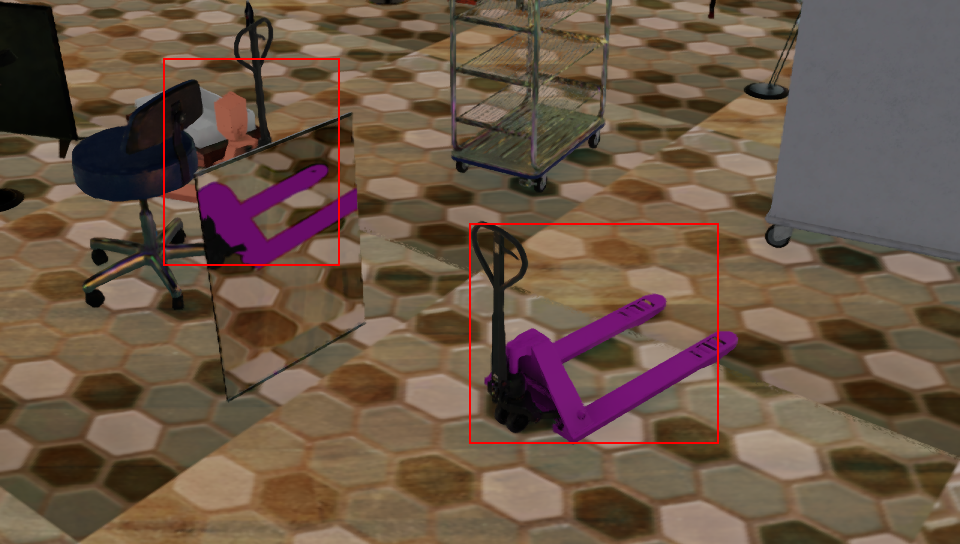

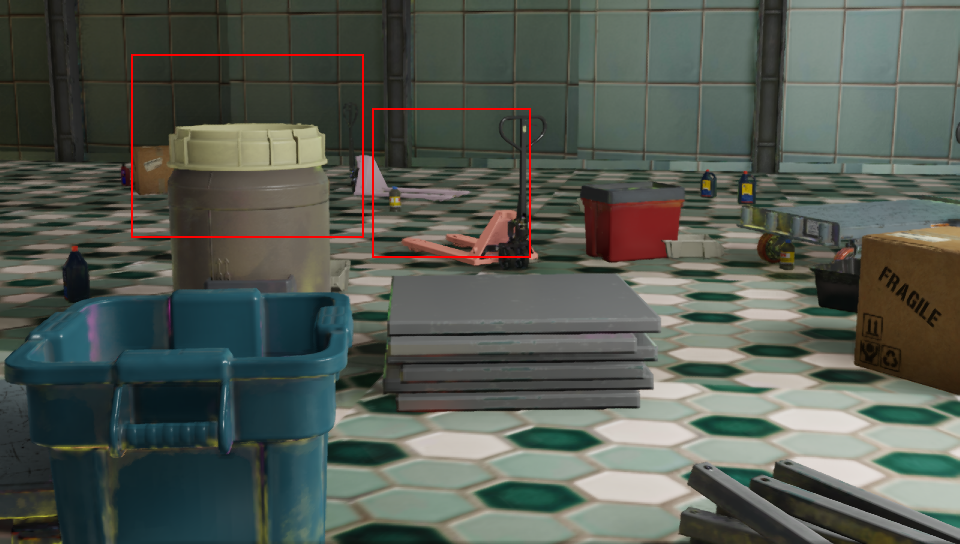

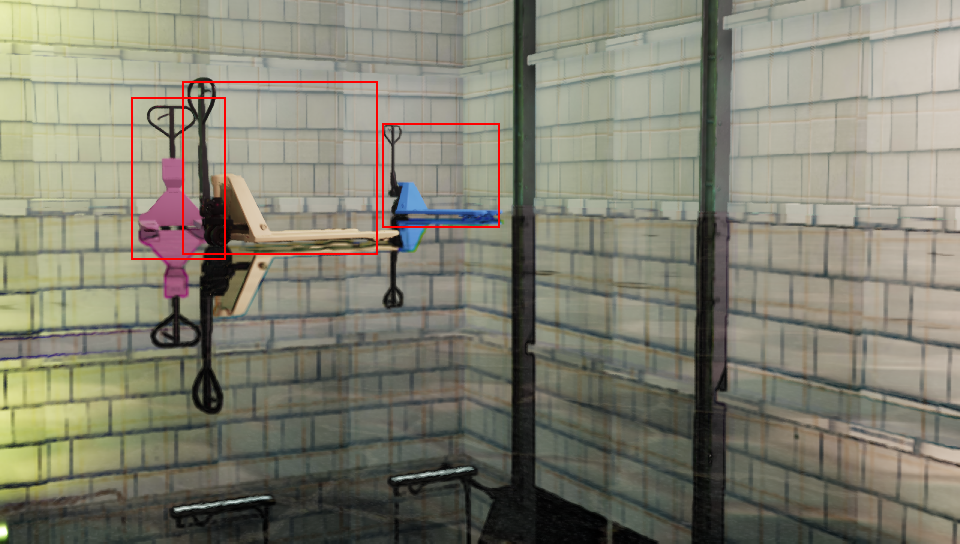

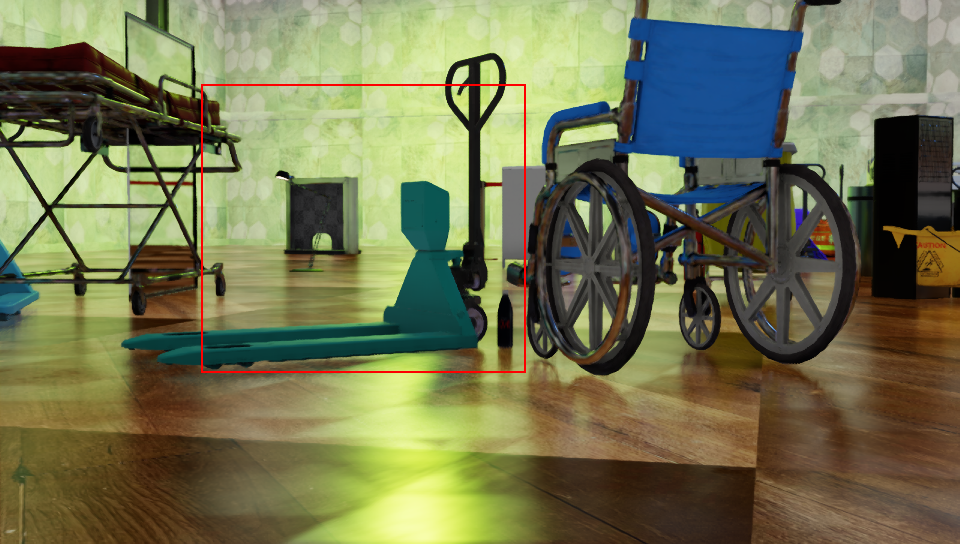

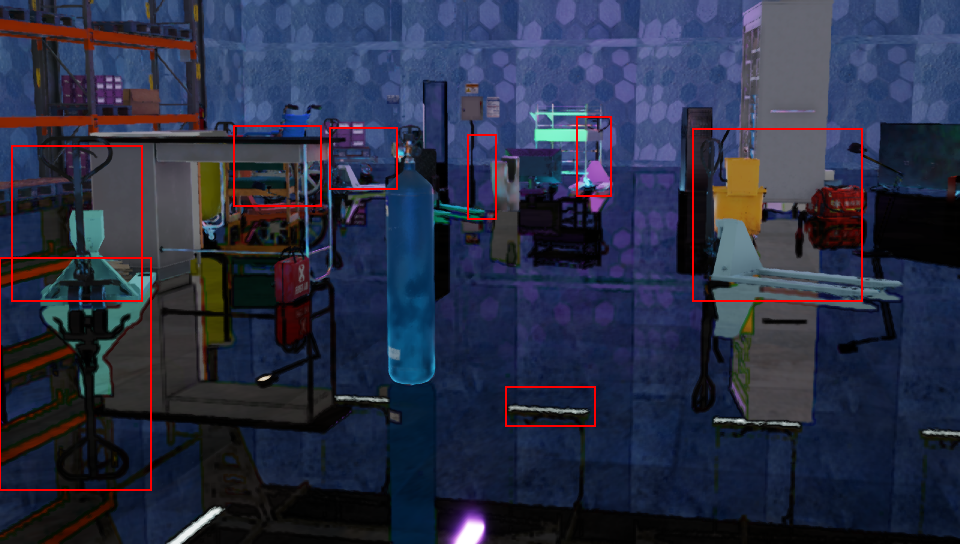

In [15]:
from IPython.display import Image, display
import os

annotated_dir = "E:/synthetic_data_generation_training_workflow/local/training/tao/detectnet_v2/resnet18_palletjack/5k_model_synthetic/images_annotated"

# List all annotated image files
image_names = os.listdir(annotated_dir)
print("Annotated images:", image_names[:10])  # Show the first 10 filenames for sanity check

# Visualize the first few annotated images (change slice as needed)
sample_images = image_names[:5]
images = [Image(filename=os.path.join(annotated_dir, img)) for img in sample_images]
display(*images)
